In [ ]:
# This is attempt 2 at k means trying to elminate the for loops to increase speed. I am not sure whay I can't segment clusters.
# This one is much faster than atempt 1, I just got it to work at 11:59 sorry for being late!!!

In [442]:
import math as m
from math import *

import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

import statistics as stats

import cv2

from skimage import io, color

from skimage import exposure

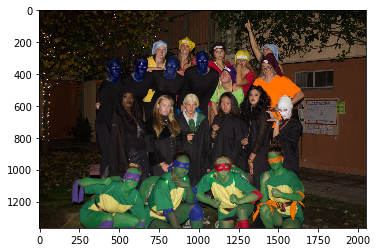

In [443]:
image1 = io.imread('Pictures\Halloween.jpg')
#image1 = cv2.imread('Pictures\color_test.png')#io.imread('Pictures\eye.jpg')
plt.imshow(image1)

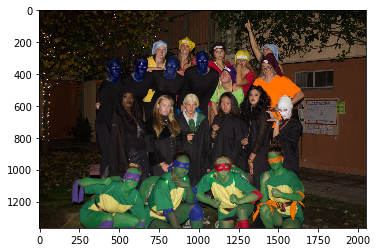

In [444]:
image = image1 #[0:500,200:850]
plt.imshow(image)
#print(image)
height = image.shape[0]
width = image.shape[1]
#print(height, width)

In [445]:
k = 3
N = int(image.size/3)
print(N)
d = 3
colors = itertools.cycle(["r", "b", "g"])
data = np.array(image)
#image = np.random.randint(0,250, size = (N,d)) #np.array(image) np.random.randint(0,200, size = (N,d))
#centroids = np.random.randint(0,250, size = (d,k))
centroids = np.array([[0, 255, 0], [5, 7, 8], [0, 0, 255]])
print(centroids, type(centroids))
pixels_col = [[255, 0, 0],[8, 6, 8], [300, 160, 100], [120, 120, 120]]



centroids = centroids.flatten()
# make an array for each cluster the size of the number of data points
cen_vect = np.empty((N,d*k),int)
cen_vect[: :] = centroids
print(cen_vect)
print(cen_vect[0])

2795520
[[  0 255   0]
 [  5   7   8]
 [  0   0 255]] <class 'numpy.ndarray'>
[[  0 255   0 ...   0   0 255]
 [  0 255   0 ...   0   0 255]
 [  0 255   0 ...   0   0 255]
 ...
 [  0 255   0 ...   0   0 255]
 [  0 255   0 ...   0   0 255]
 [  0 255   0 ...   0   0 255]]
[  0 255   0   5   7   8   0   0 255]


In [446]:
#print(data)
datatest = image.flatten()
print(len(datatest))
re = datatest.reshape(N,d)
data = re
print(data)
#print(data[55])
#plt.imshow(data)

8386560
[[10  4  8]
 [10  4  8]
 [10  4  8]
 ...
 [37 31 19]
 [35 29 17]
 [30 24 12]]


In [447]:
prev_location = np.empty((1,N))
curr_location = np.empty((1,N))
count = 0
while (True):
    
    centroids = centroids.flatten()
    # make an array for each cluster the size of the number of data points
    cen_vect = np.empty((N,d*k),int)
    cen_vect[: :] = centroids
    # calculate difference between data points and specific columns of matrix
    i = 0
    prev_location = curr_location
    clusterdist = np.empty((k,N))
    for i in range (0,k):
        #calculated distance between centroid of cluster i and all data points
        col= i*3
        diff = data - cen_vect[:,col:col+3]
        #print(diff)
        trans = diff.transpose()
        square = np.square(trans)
        #print('square',square)
        distance = square.transpose()      
        #print('distance', distance)
        dis = np.sum(distance, axis=1)
        #print('dist', dis)
        #distance = np.sqrt(dis)
       # print(sroot)
        distance = np.sqrt(dis)
       # print('distance',distance)
        clusterdist[i,:] = distance
       # print('cluster distance', clusterdist, 'dimensions', clusterdist.shape)
    
    # now want to find the minium distance from the data point to each centroid and store it in matrix
    #cluster_dist.reshape(N,k)
    #print(clusterdist, clusterdist.shape)
    curr_location = clusterdist.argmin(axis =0)
    print("cluster location", curr_location)
    print('previous location', prev_location)
    if np.array_equal(prev_location, curr_location):
        break
    print("curr location size",curr_location.size, 'prev size', prev_location.size)
    
    # calculate new centroids

    # for calculating new centroids
    test = np.reshape(curr_location, (N,1))
    #print(test)
    number = np.arange(N)
    number = np.reshape(number, (N,1))

    combine = np.hstack((test,data,number))
    print('combine',combine)
    sort = combine[np.argsort(combine[:,0])]
    combinetest = sort
    
    #k = 3
    #averages = np.empty((1,k*d))
    averages = []

    for i in range (0,k):
       # if curr_location.includes(k):
        index = np.where(sort[:,0]==i)
        print('index',index)
        index1 = index[0]
            #print('lengt', len(index1))
            #print(index)
        start = index1[0]
            #print('start',start)
        end = index1[len(index1)-1]
            #print('end',end)
        insert = np.empty((end- start +1 +1,d))
            #print(sort[start:end,1:d+1])
        mean = np.mean(sort[start:end,1:d+1], axis=0)
        print('mean',mean)
        insert = np.empty((end-start+1,d))
        insert[:,:] = mean
            #print('insert',insert)
        combinetest[start:end+1, 1:d+1] = insert
        averages = np.concatenate((averages, mean), axis = 0)
            #print('avg array', averages)
        print('next loop')
            # assignes new calculated averages to start process again
        centroids = averages
        print("combine test", combinetest)
    centroids = averages
        
        
    
    
    count = count + 1

cluster location [1 1 1 ... 1 1 1]
previous location [[0. 0. 0. ... 0. 0. 0.]]
curr location size 2795520 prev size 2795520
combine [[      1      10       4       8       0]
 [      1      10       4       8       1]
 [      1      10       4       8       2]
 ...
 [      1      37      31      19 2795517]
 [      1      35      29      17 2795518]
 [      1      30      24      12 2795519]]
index (array([     0,      1,      2, ..., 134662, 134663, 134664], dtype=int64),)
mean [166.17848126 172.80143914 106.36920781]
next loop
combine test [[      0     166     172     106 2585104]
 [      0     166     172     106  662203]
 [      0     166     172     106  662202]
 ...
 [      2     103      75     149 2169417]
 [      2     114     136     159  458168]
 [      2      75      86     176 1971066]]
index (array([ 134665,  134666,  134667, ..., 2779446, 2779447, 2779448],
      dtype=int64),)
mean [51.46463283 44.15626575 31.48565459]
next loop
combine test [[      0     166     172  

cluster location [1 1 1 ... 1 1 1]
previous location [1 1 1 ... 1 1 1]
curr location size 2795520 prev size 2795520
combine [[      1      10       4       8       0]
 [      1      10       4       8       1]
 [      1      10       4       8       2]
 ...
 [      1      37      31      19 2795517]
 [      1      35      29      17 2795518]
 [      1      30      24      12 2795519]]
index (array([     0,      1,      2, ..., 250209, 250210, 250211], dtype=int64),)
mean [186.35879318 143.64590286  87.73964774]
next loop
combine test [[      0     186     143      87 1584195]
 [      0     186     143      87  969860]
 [      0     186     143      87  969861]
 ...
 [      2      35     115      80 2157580]
 [      2      34     116      80 2157582]
 [      2      66     108      86 1397759]]
index (array([ 250212,  250213,  250214, ..., 2196597, 2196598, 2196599],
      dtype=int64),)
mean [35.65288815 26.12198294 19.04108176]
next loop
combine test [[      0     186     143      87 1

cluster location [1 1 1 ... 1 1 1]
previous location [1 1 1 ... 1 1 1]


[[      1      35      25      18       0]
 [      1      35      25      18       1]
 [      1      35      25      18       2]
 ...
 [      1      35      25      18 2795517]
 [      1      35      25      18 2795518]
 [      1      35      25      18 2795519]]
[[35 25 18]
 [35 25 18]
 [35 25 18]
 ...
 [35 25 18]
 [35 25 18]
 [35 25 18]]
35


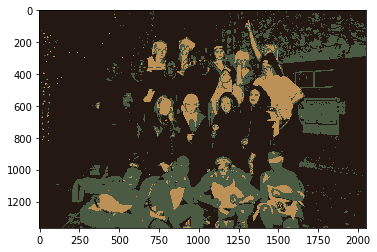

In [448]:
# for plotting return pixels back to positions with values changed 
newpixelval = combinetest[np.argsort(combinetest[:,4])]
print(newpixelval)
pixels = newpixelval[:, 1:4]
print(pixels)
pixel_loc = 0;
image2 = image
print(pixels[pixel_loc,0])
for i in range (0,height):
        for j in range (0, width):
                image2[i][j] = pixels[pixel_loc,0], pixels[pixel_loc,1],pixels[pixel_loc,2]
                pixel_loc = pixel_loc +1
                
plt.imshow(image2)

In [377]:
# for calculating new centroids
test = np.reshape(curr_location, (N,1))
#print(test)

number = np.arange(N)
number = np.reshape(number, (N,1))
#print(number)

combine = np.hstack((test,data,number))
#print('combine',combine)
sort = combine[np.argsort(combine[:,0])]
combinetest = sort
k = 3
#averages = np.empty((1,k*d))
averages = []
print('sort',sort)
print()
print()

for i in range (0,k):
    index = np.where(sort[:,0]==i)
    print('index',index)
    index1 = index[0]
    print('lengt', len(index1))
    print(index)
    start = index1[0]
    print('start',start)
    end = index1[len(index1)-1]
    print('end',end)
    insert = np.empty((end- start +1 +1,d))
    #print(sort[start:end,1:d+1])
    mean = np.mean(sort[start:end,1:d+1], axis=0)
    print('mean',mean)
    insert = np.empty((end-start+1,d))
    insert[:,:] = mean
    print('insert',insert)
    combinetest[start:end+1, 1:d+1] = insert
    averages = np.concatenate((averages, mean), axis = 0)
    print('avg array', averages)
    print('next loop')
    # assignes new calculated averages to start process again
    centroids = averages
    print("combine test", combinetest)
    
        


sort [[  0 142 246  76   1]
 [  0 183 189  72   2]
 [  1 113 170 181   3]
 [  1  73  18 170   4]
 [  1 245  32 167   7]
 [  1 157 125 216   8]
 [  1 213   5  10   9]
 [  2  64 229  92   0]
 [  2  77 223  84   5]
 [  2  74 153 105   6]]


index (array([0, 1], dtype=int64),)
lengt 2
(array([0, 1], dtype=int64),)
start 0
end 1
mean [142. 246.  76.]
insert [[142. 246.  76.]
 [142. 246.  76.]]
avg array [142. 246.  76.]
next loop
combine test [[  0 142 246  76   1]
 [  0 142 246  76   2]
 [  1 113 170 181   3]
 [  1  73  18 170   4]
 [  1 245  32 167   7]
 [  1 157 125 216   8]
 [  1 213   5  10   9]
 [  2  64 229  92   0]
 [  2  77 223  84   5]
 [  2  74 153 105   6]]
index (array([2, 3, 4, 5, 6], dtype=int64),)
lengt 5
(array([2, 3, 4, 5, 6], dtype=int64),)
start 2
end 6
mean [147.    86.25 183.5 ]
insert [[147.    86.25 183.5 ]
 [147.    86.25 183.5 ]
 [147.    86.25 183.5 ]
 [147.    86.25 183.5 ]
 [147.    86.25 183.5 ]]
avg array [142.   246.    76.   147.    86.25 183.5 ]
next loop
c